In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

In [ ]:
#Cargamos los datos
df = pd.read_csv("/content/datos_cleaned.csv")

print("Dataset cargado correctamente")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
display(df.head())

Dataset cargado correctamente
Filas: 364346, Columnas: 13



,Transaction_Date,price,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,index_name,index_group_name,garment_group_name,club_member_status,fashion_news_frequency,age
0,2018-09-20,0.020322,Garment Upper body,Solid,Dark Pink,Dark,Pink,Ladieswear,Ladieswear,Dresses Ladies,ACTIVE,NONE,24.0
1,2018-09-20,0.045746,Garment Lower body,Denim,Blue,Medium Dusty,Blue,Menswear,Menswear,Trousers Denim,ACTIVE,Regularly,58.0
2,2018-09-20,0.022017,Garment Full body,Solid,Dark Grey,Dark,Grey,Baby Sizes 50-98,Baby/Children,Jersey Basic,PRE-CREATE,NONE,34.0
3,2018-09-20,0.025407,Garment Upper body,Melange,Grey,Dusty Light,Grey,Ladieswear,Ladieswear,Knitwear,ACTIVE,NONE,46.0
4,2018-09-20,0.024610,Garment Upper body,Solid,Blue,Medium Dusty,Blue,Ladieswear,Ladieswear,Knitwear,ACTIVE,NONE,49.0


In [ ]:
#Información general del data set
print("\n Información general del dataset:")
df.info()

print("\n Tipos de variables:")
print(df.dtypes.value_counts())


 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364346 entries, 0 to 364345
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Transaction_Date              364346 non-null  object 
 1   price                         364346 non-null  float64
 2   product_group_name            364346 non-null  object 
 3   graphical_appearance_name     364345 non-null  object 
 4   colour_group_name             364345 non-null  object 
 5   perceived_colour_value_name   364345 non-null  object 
 6   perceived_colour_master_name  364345 non-null  object 
 7   index_name                    364345 non-null  object 
 8   index_group_name              364345 non-null  object 
 9   garment_group_name            364345 non-null  object 
 10  club_member_status            363416 non-null  object 
 11  fashion_news_frequency        362887 non-null  object 
 12  age      

In [ ]:
#Resumen estadistico
print("\n Estadísticas descriptivas (variables numéricas):")
display(df.describe().T)


 Estadísticas descriptivas (variables numéricas):


,count,mean,std,min,25%,50%,75%,max
price,364346.0,0.028665,0.020891,0.000644,0.015237,0.025407,0.033881,0.50678
age,364346.0,36.891489,12.771402,16.000000,26.000000,33.000000,48.000000,99.00000



 Variables numéricas (2): ['price', 'age']
 Variables categóricas (11): ['Transaction_Date', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'index_name', 'index_group_name', 'garment_group_name', 'club_member_status', 'fashion_news_frequency']


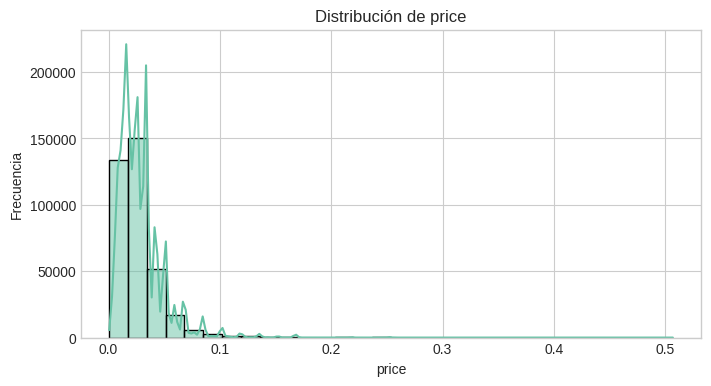

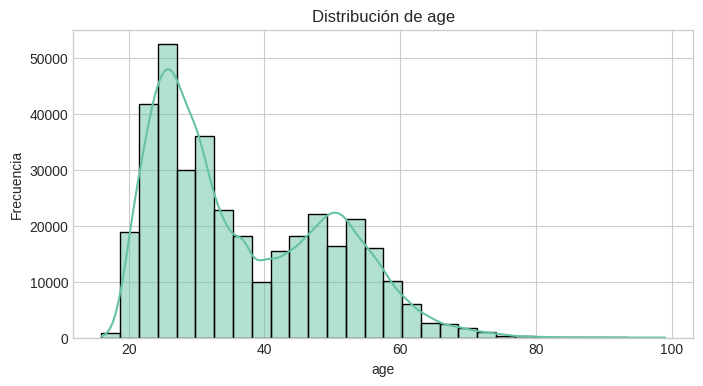

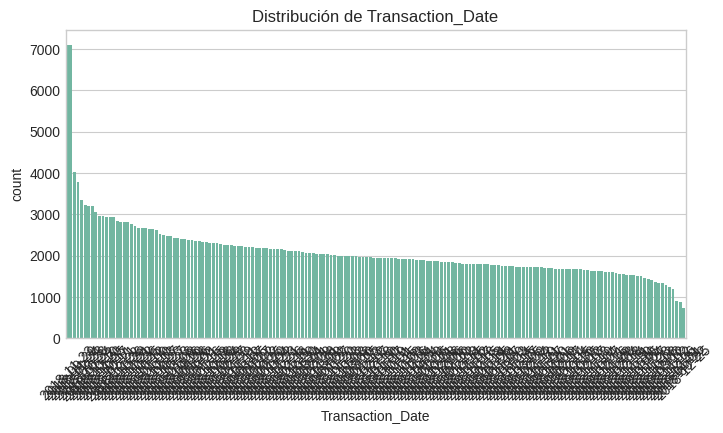

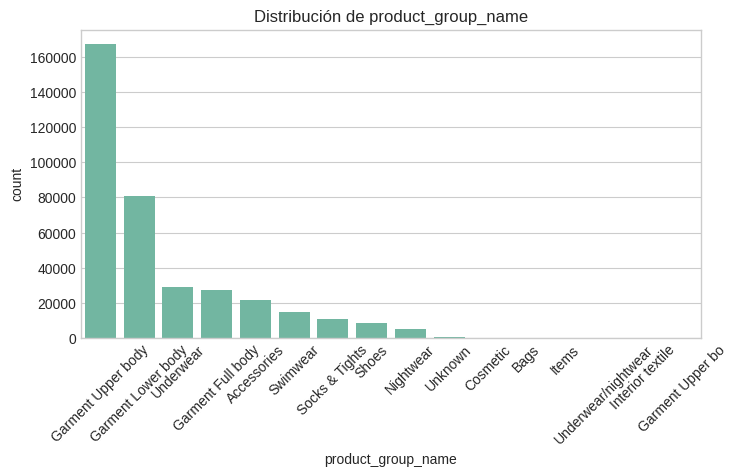

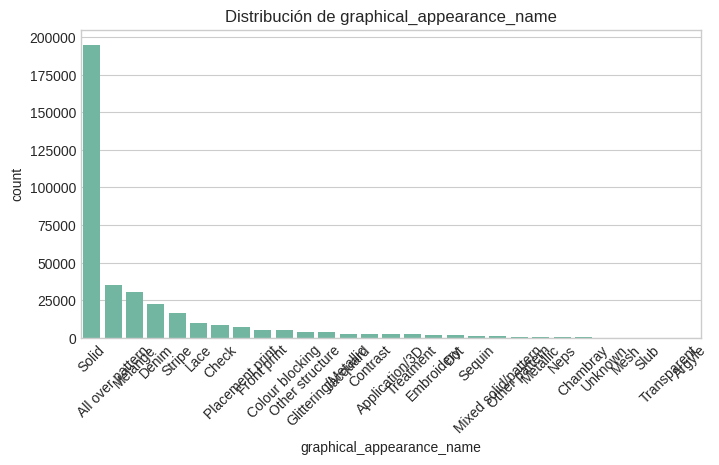

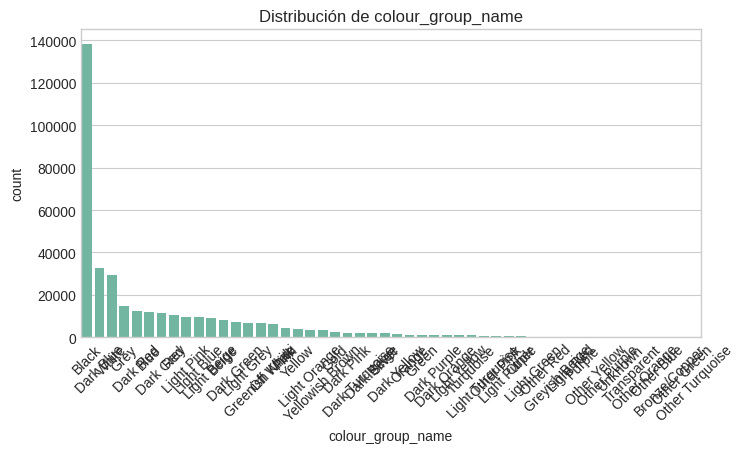

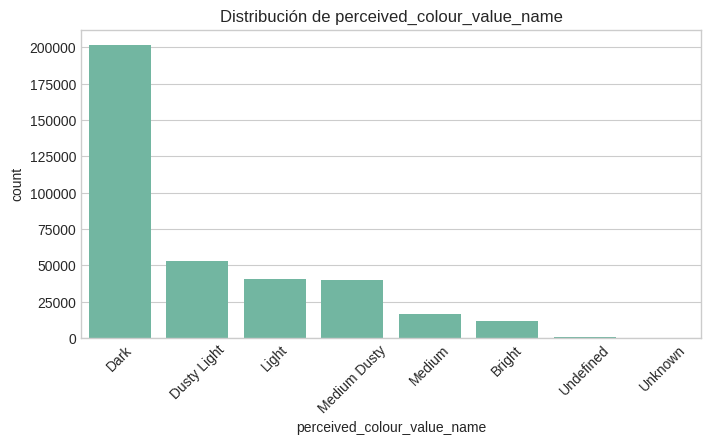

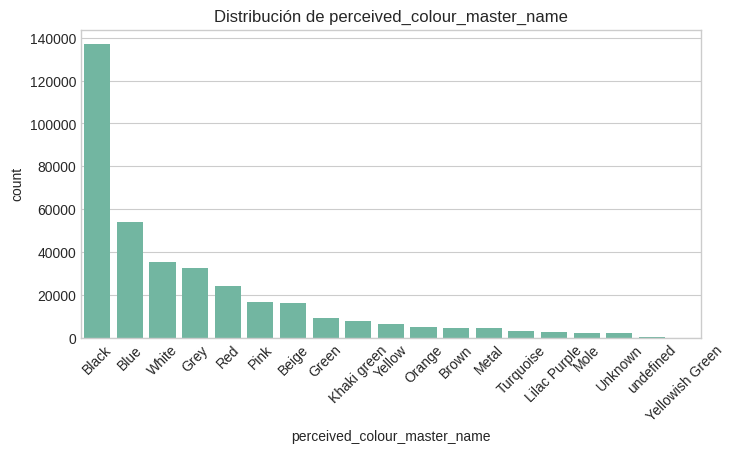

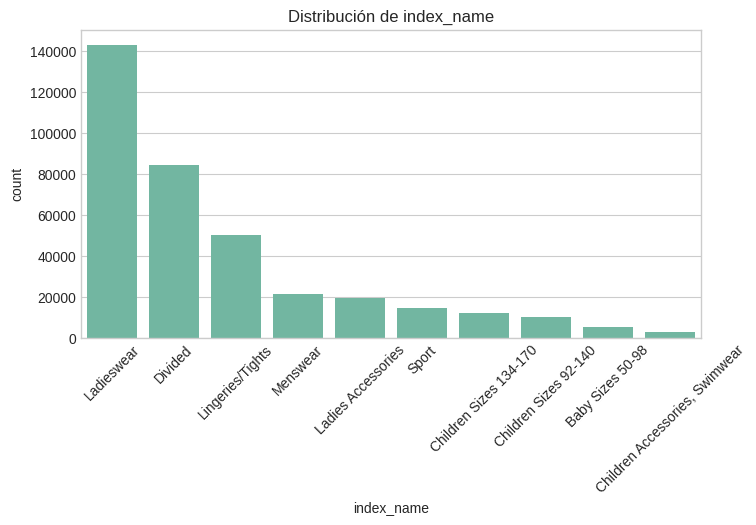

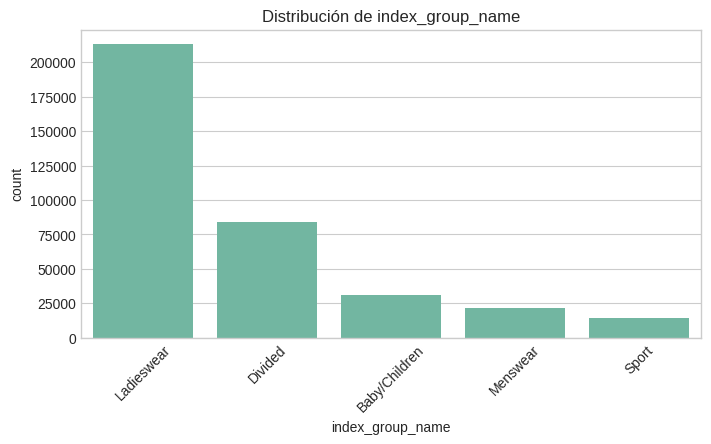

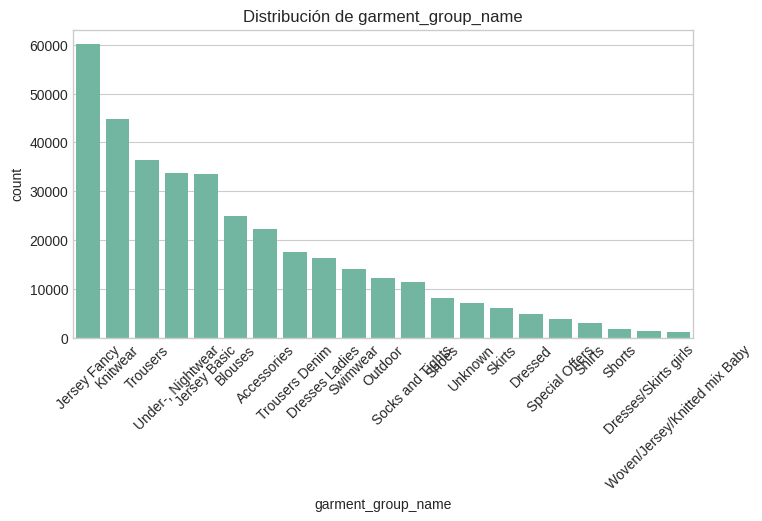

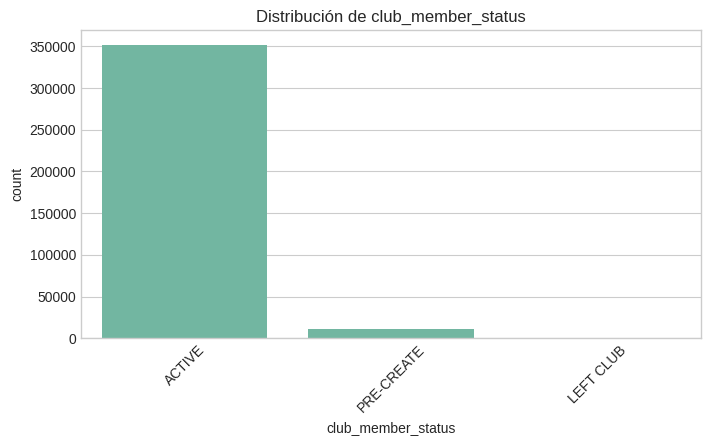

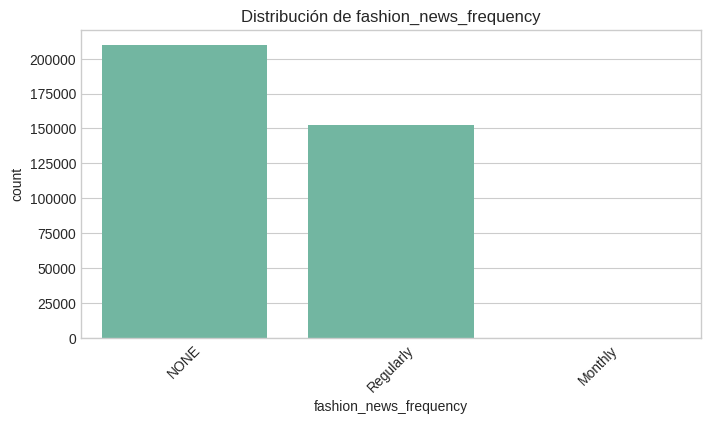

In [ ]:
#Analisis Univariado

#Detectar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"\n Variables numéricas ({len(num_cols)}): {list(num_cols)}")
print(f" Variables categóricas ({len(cat_cols)}): {list(cat_cols)}")

#Distribución de variables numéricas
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

#Conteo de categorías
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


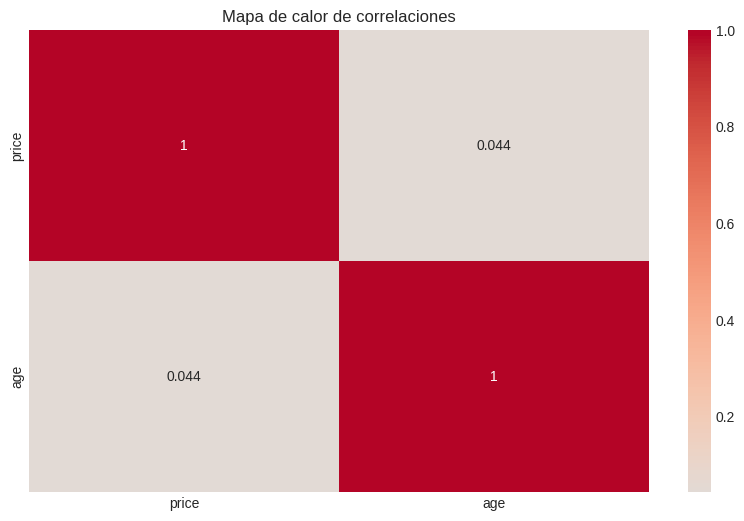

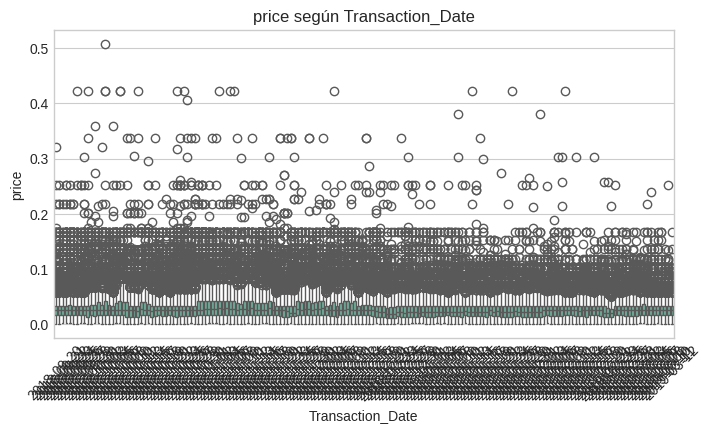

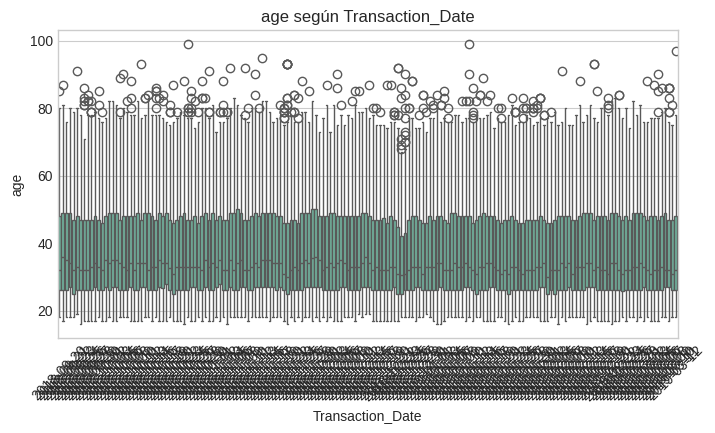

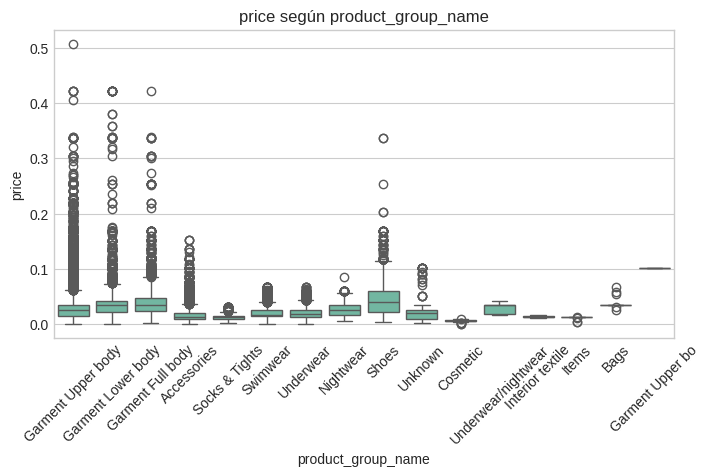

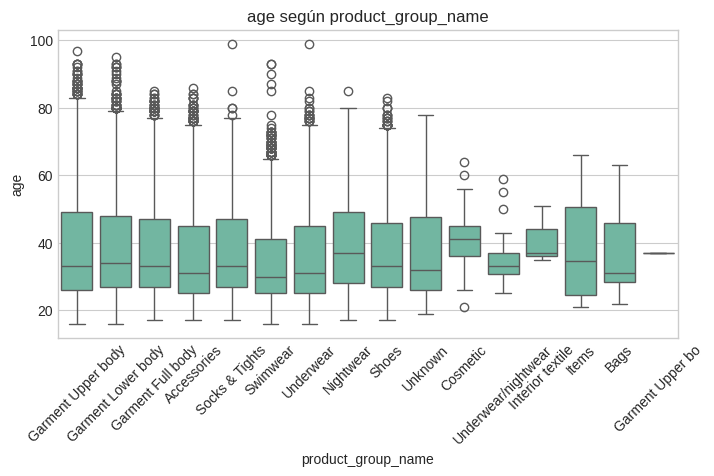

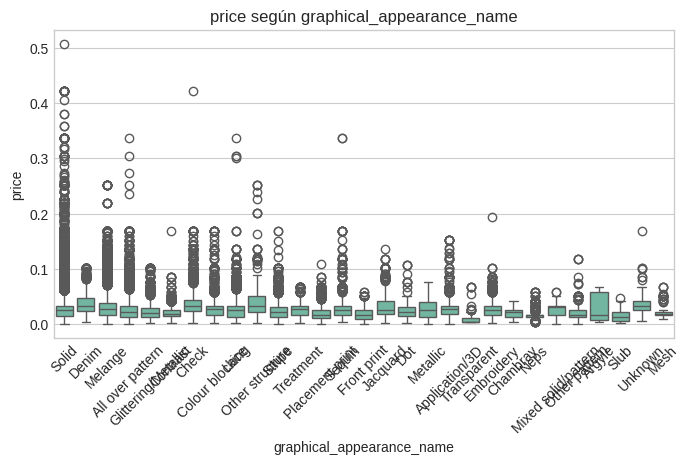

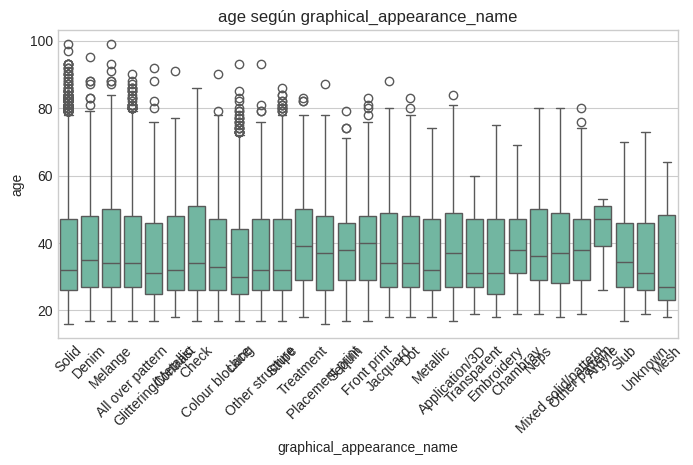

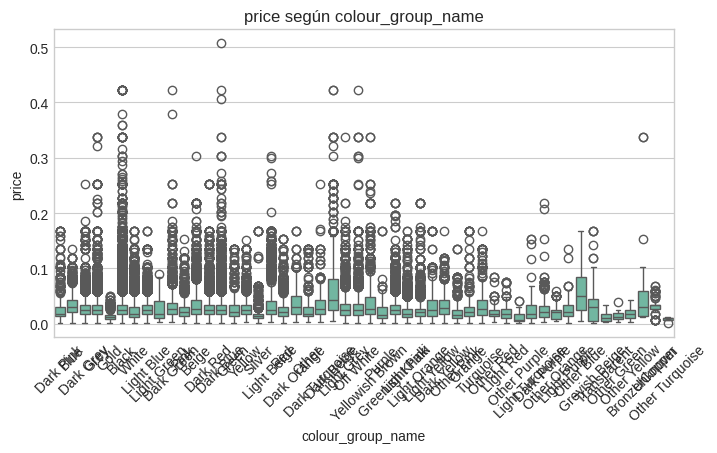

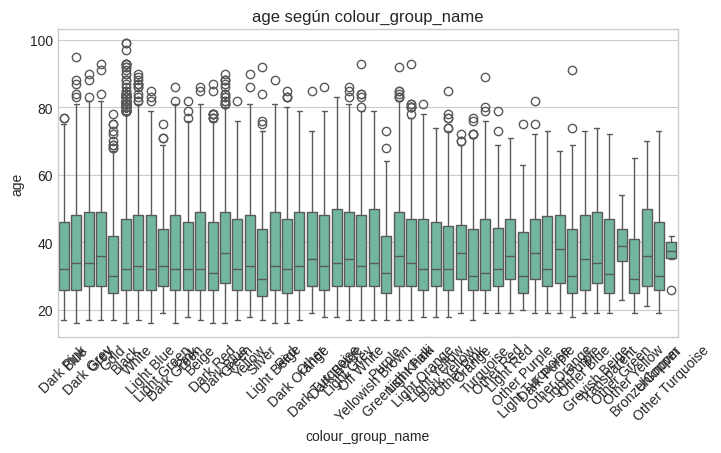

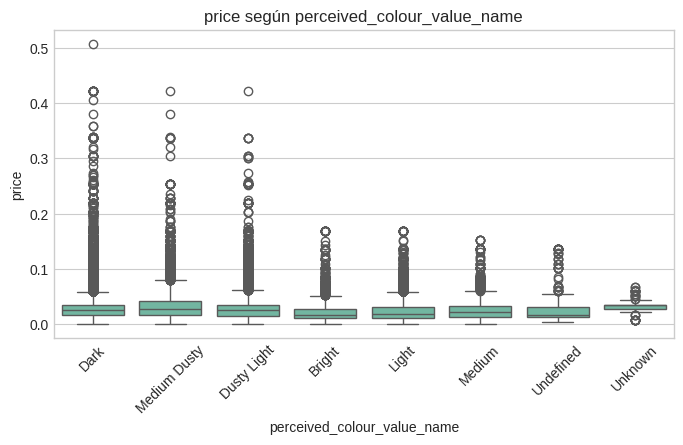

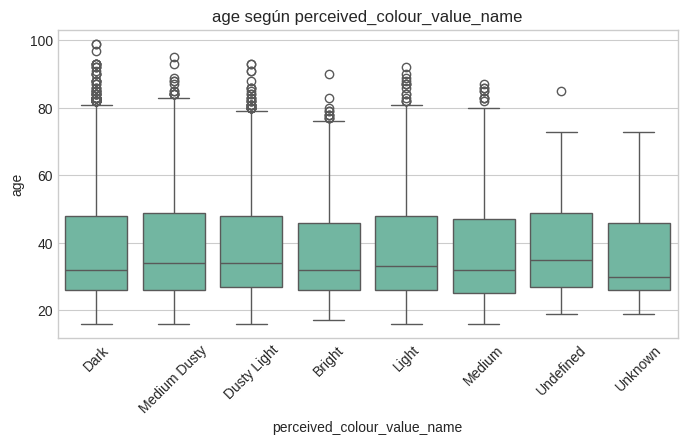

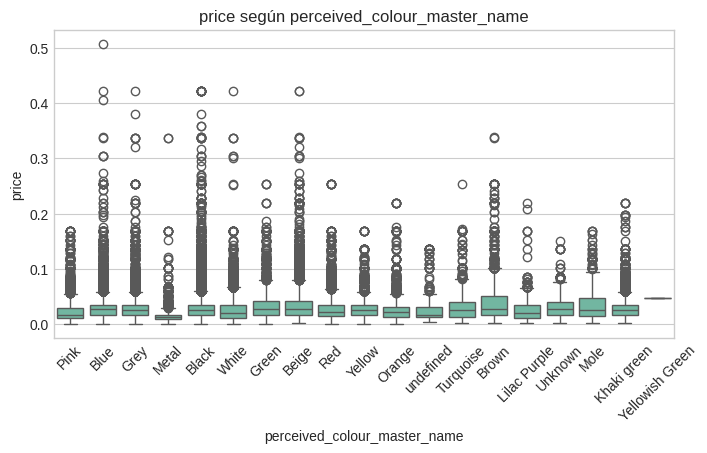

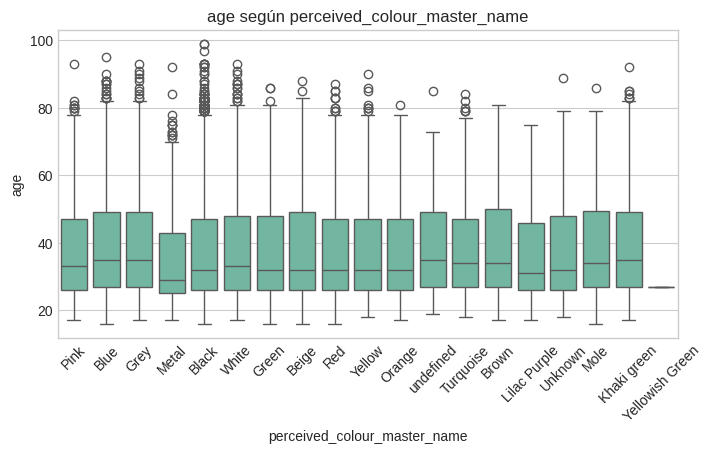

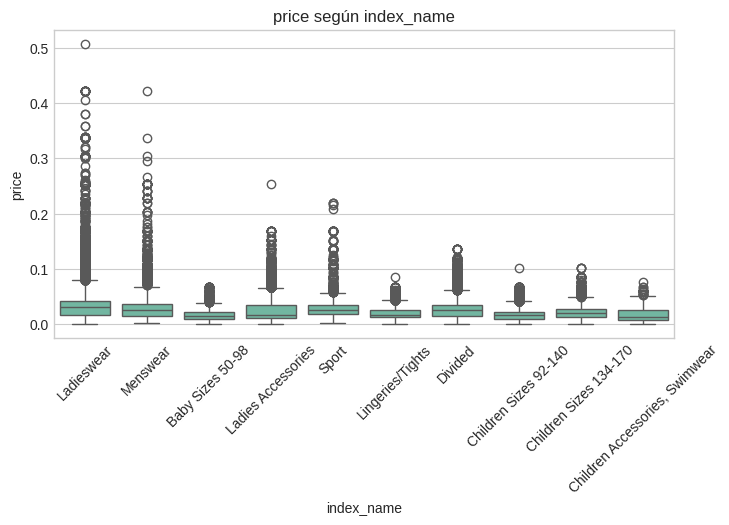

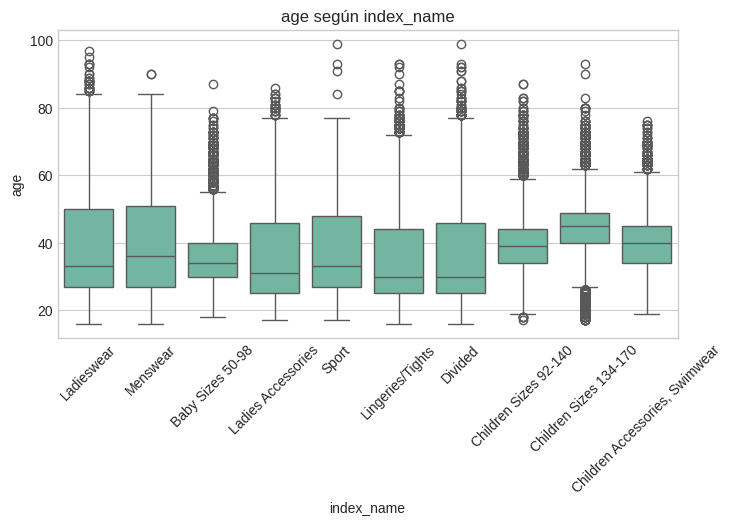

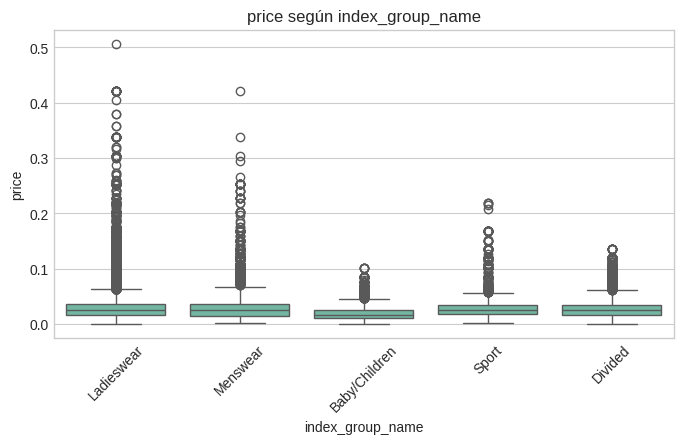

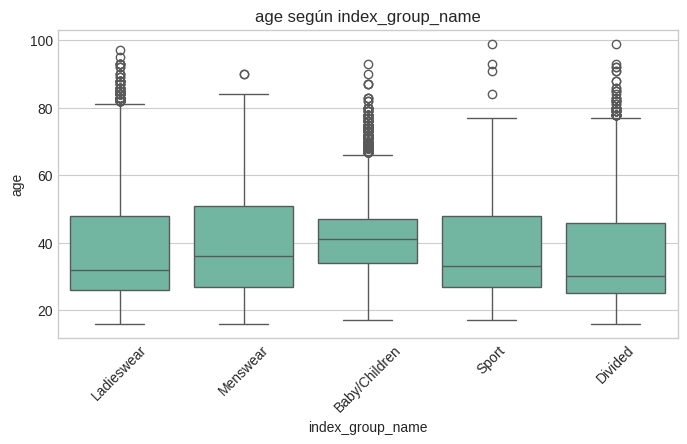

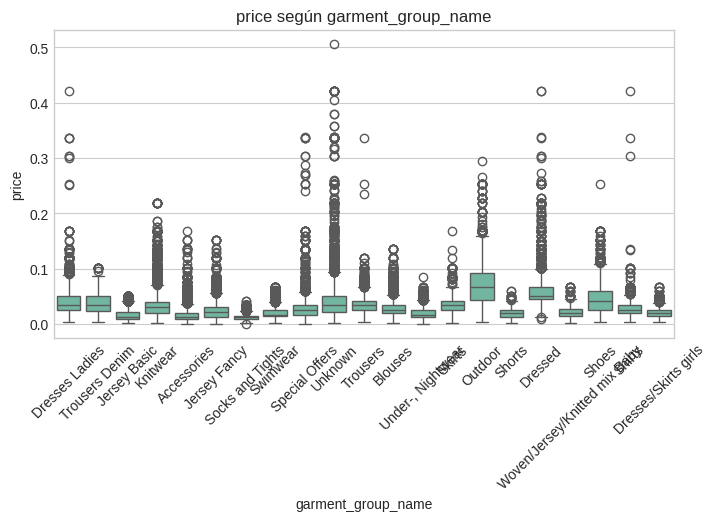

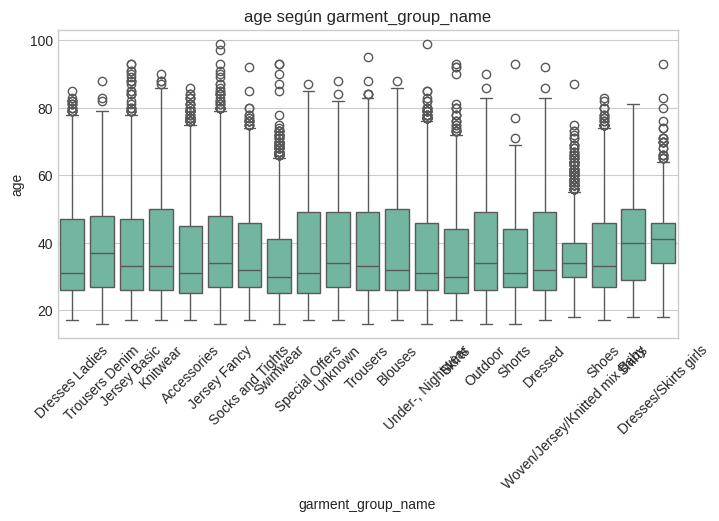

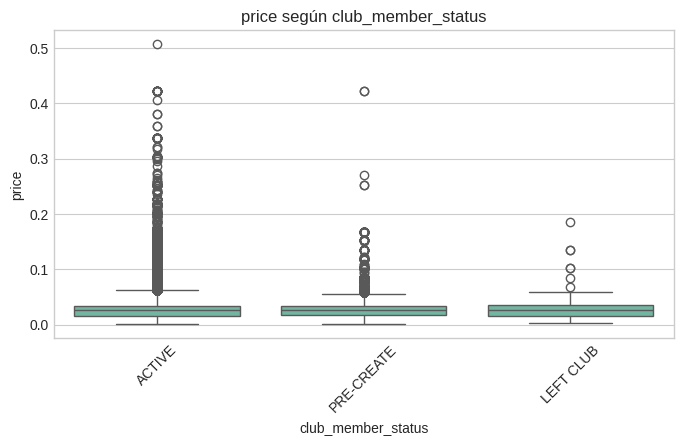

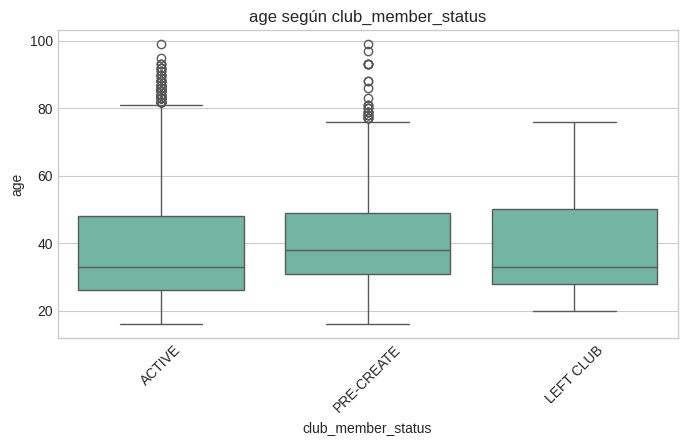

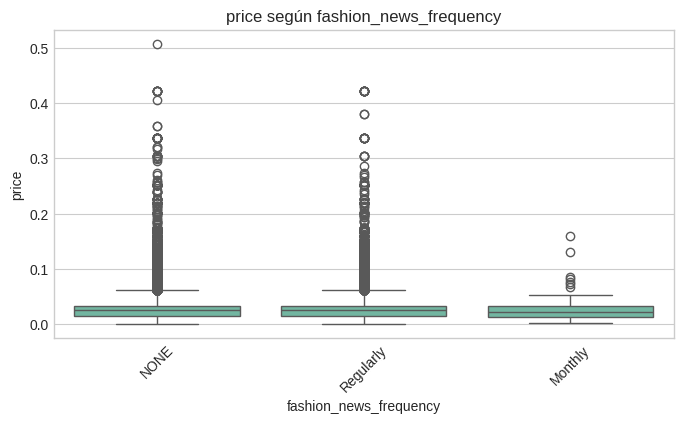

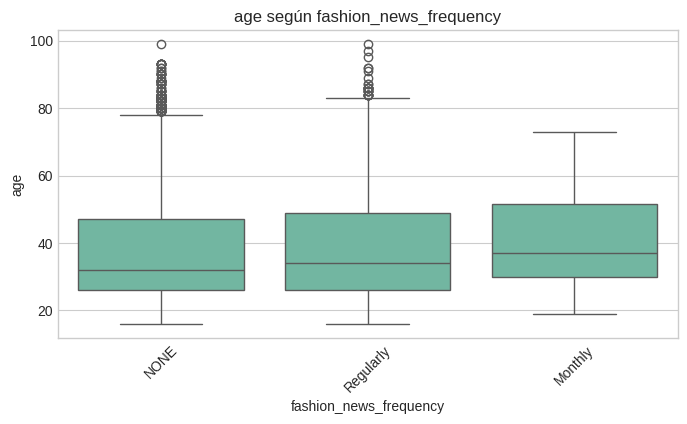

In [ ]:
#Analisis de relaciones

#Correlaciones numéricas
if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
    plt.title("Mapa de calor de correlaciones")
    plt.show()

#Relaciones numéricas vs categóricas
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df, x=cat, y=num)
        plt.title(f"{num} según {cat}")
        plt.xticks(rotation=45)
        plt.show()

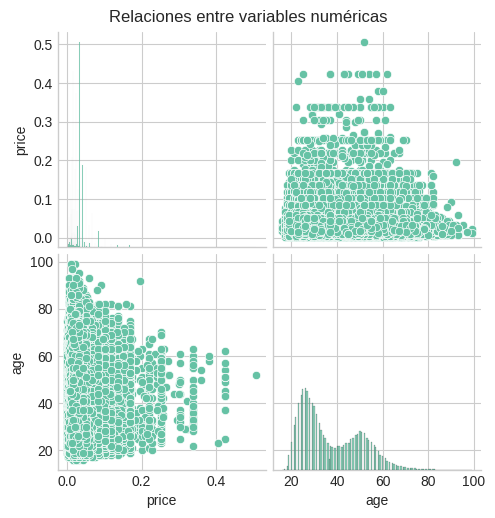

In [ ]:
#Distribución y correlación avanzada
if len(num_cols) <= 10:
    sns.pairplot(df[num_cols])
    plt.suptitle("Relaciones entre variables numéricas", y=1.02)
    plt.show()

In [ ]:
#Insights automáticos

# Variables con mayor varianza
varianza = df[num_cols].var().sort_values(ascending=False)
print("\n Variables con mayor varianza:")
display(varianza.head())

# Relaciones fuertes (>0.6 o <-0.6)
corr = df[num_cols].corr()
fuertes = corr[(corr >= 0.6) | (corr <= -0.6)]
print("\n Relaciones fuertemente correlacionadas (>|0.6|):")
display(fuertes.dropna(how='all').dropna(axis=1, how='all'))

# Categóricas con menos diversidad
print("\n Variables categóricas con poca variabilidad:")
for col in cat_cols:
    unique_vals = df[col].nunique()
    if unique_vals < 5:
        print(f" {col}: {unique_vals} categorías → {df[col].value_counts(normalize=True).head(3)}")



 Variables con mayor varianza:


,0
age,163.108718
price,0.000436



 Relaciones fuertemente correlacionadas (>|0.6|):


,price,age
price,1.0,NaN
age,NaN,1.0



 Variables categóricas con poca variabilidad:
 club_member_status: 3 categorías → club_member_status
ACTIVE        0.968323
PRE-CREATE    0.031314
LEFT CLUB     0.000363
Name: proportion, dtype: float64
 fashion_news_frequency: 3 categorías → fashion_news_frequency
NONE         0.578783
Regularly    0.420657
Monthly      0.000559
Name: proportion, dtype: float64
